# Análisis Exploratorio del dataset MovieLens 20M

## Importación de librerías

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Estilo de visualización

In [2]:

sns.set(style="whitegrid")

## Carga de archivos

Nota: se cuentan lineas de dataset de ratings y se fuerzan los tipos de datos para que no de un error posterior en el shape de ratings

In [3]:

movies = pd.read_csv('movie.csv')
ratings = pd.read_csv('rating.csv')
tags = pd.read_csv('tag.csv')
genome_tags = pd.read_csv('genome_tags.csv')
genome_scores = pd.read_csv('genome_scores.csv')

In [26]:
# Contar líneas del archivo
num_lines = sum(1 for line in open('rating.csv'))
print(f"Total de líneas en el archivo: {num_lines - 1}")

Total de líneas en el archivo: 20000263


In [27]:
ratings = pd.read_csv(
    "rating.csv",
    dtype={
        "userId": "int32",
        "movieId": "int32",
        "rating": "float32",
        "timestamp": "object"
    }
)
print("Shape of ratings dataset:", ratings.shape)

Shape of ratings dataset: (20000263, 4)


## Función para resumen de dataset

In [30]:
def summarize_data(df, name):
    print(f"\n--- {name} ---\n")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("\nMissing values:\n", df.isnull().sum())
    print("\nData types:\n", df.dtypes)
    print("\nFirst few rows:\n", df.head())
    print("\nLast few rows:\n", df.tail())

# 1. EDA para movie.csv

In [31]:

print("=== EDA for movies.csv ===")
summarize_data(movies, "Movies")

=== EDA for movies.csv ===

--- Movies ---

Shape: (27278, 4)
Columns: ['movieId', 'title', 'genres', 'year']

Missing values:
 movieId     0
title       0
genres      0
year       22
dtype: int64

Data types:
 movieId      int64
title       object
genres      object
year       float64
dtype: object

First few rows:
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres    year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995.0  
1                   Adventure|Children|Fantasy  1995.0  
2                               Comedy|Romance  1995.0  
3                         Comedy|Drama|Romance  1995.0  
4                                       Comedy  1995.0  

Last few rows:
        movieId       

## Extracción del año desde el título

In [32]:

movies['year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False)
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')

## Distribución de películas por año

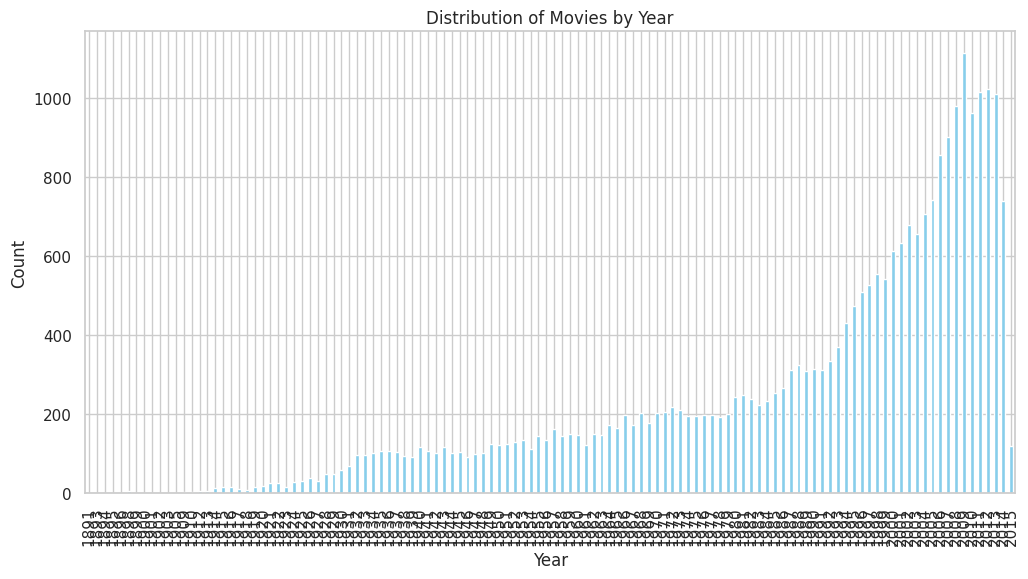

In [33]:

plt.figure(figsize=(12, 6))
movies['year'].dropna().astype(int).value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribution of Movies by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# 2. EDA para rating.csv

In [34]:

print("=== EDA for ratings.csv ===")
summarize_data(ratings, "Ratings")

=== EDA for ratings.csv ===

--- Ratings ---

Shape: (20000263, 4)
Columns: ['userId', 'movieId', 'rating', 'timestamp']

Missing values:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Data types:
 userId         int32
movieId        int32
rating       float32
timestamp     object
dtype: object

First few rows:
    userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40

Last few rows:
           userId  movieId  rating            timestamp
20000258  138493    68954     4.5  2009-11-13 15:42:00
20000259  138493    69526     4.5  2009-12-03 18:31:48
20000260  138493    69644     3.0  2009-12-07 18:10:57
20000261  138493    70286     5.0  2009-11-13 15:42:24
20000262  138493    71619     2.5  2009-10-17 20:25:36


## Distribución de ratings

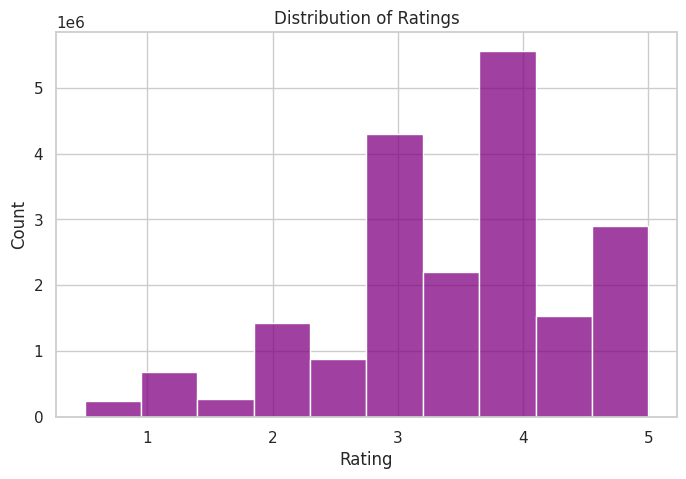

In [35]:

plt.figure(figsize=(8, 5))
sns.histplot(ratings['rating'], bins=10, kde=False, color='purple')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

## Rating medio por película / rating medio de las 20 películas con más ratings

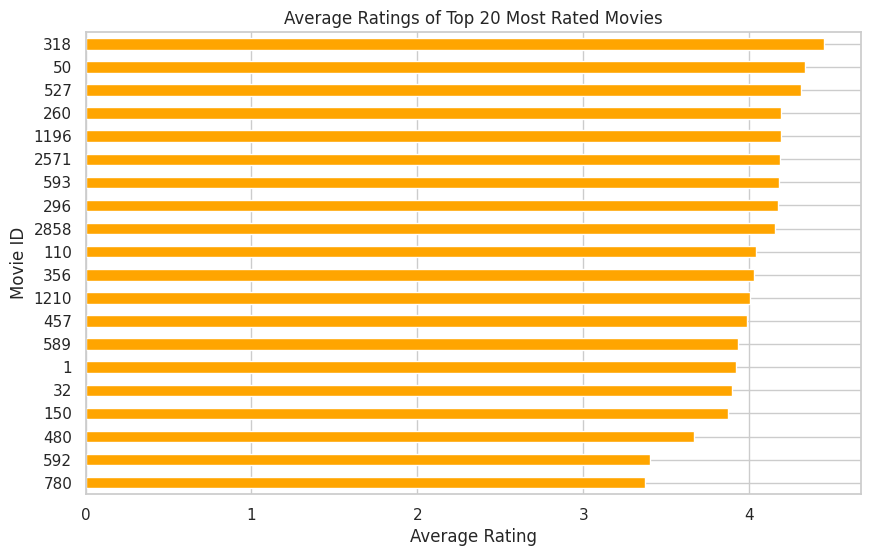

In [36]:
# Average rating per movie
average_rating_per_movie = ratings.groupby('movieId')['rating'].mean()

# Plot: Average ratings for top 20 movies with the most ratings
most_rated_movies = ratings['movieId'].value_counts().head(20).index
avg_ratings_top20 = average_rating_per_movie.loc[most_rated_movies]
plt.figure(figsize=(10, 6))
avg_ratings_top20.sort_values().plot(kind='barh', color='orange')
plt.title("Average Ratings of Top 20 Most Rated Movies")
plt.xlabel("Average Rating")
plt.ylabel("Movie ID")
plt.show()

# 3. EDA para tags.csv

In [37]:

print("=== EDA for tags.csv ===")
summarize_data(tags, "Tags")

=== EDA for tags.csv ===

--- Tags ---

Shape: (465564, 4)
Columns: ['userId', 'movieId', 'tag', 'timestamp']

Missing values:
 userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

Data types:
 userId        int64
movieId       int64
tag          object
timestamp    object
dtype: object

First few rows:
    userId  movieId            tag            timestamp
0      18     4141    Mark Waters  2009-04-24 18:19:40
1      65      208      dark hero  2013-05-10 01:41:18
2      65      353      dark hero  2013-05-10 01:41:19
3      65      521  noir thriller  2013-05-10 01:39:43
4      65      592      dark hero  2013-05-10 01:41:18

Last few rows:
         userId  movieId            tag            timestamp
465559  138446    55999        dragged  2013-01-23 23:29:32
465560  138446    55999  Jason Bateman  2013-01-23 23:29:38
465561  138446    55999         quirky  2013-01-23 23:29:38
465562  138446    55999            sad  2013-01-23 23:29:32
465563  138472      92

## Etiquetas más comunes


In [38]:
most_common_tags = tags['tag'].value_counts().head(20)

##  Plot: Las 20 etiquetas más comunes

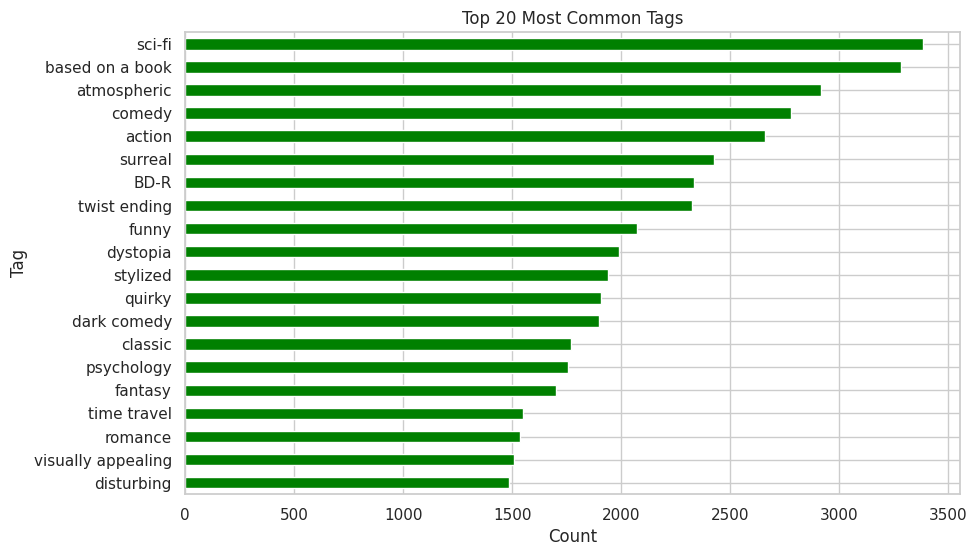

In [39]:

plt.figure(figsize=(10, 6))
most_common_tags.sort_values().plot(kind='barh', color='green')
plt.title("Top 20 Most Common Tags")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.show()

## Etiquetas únicas

In [40]:

print("\nUnique genome tags:", genome_tags['tagId'].nunique())


Unique genome tags: 1128


# 5. EDA para genome-scores.csv

In [41]:

print("=== EDA for genome-scores.csv ===")
summarize_data(genome_scores, "Genome Scores")

=== EDA for genome-scores.csv ===

--- Genome Scores ---

Shape: (11709768, 3)
Columns: ['movieId', 'tagId', 'relevance']

Missing values:
 movieId      0
tagId        0
relevance    0
dtype: int64

Data types:
 movieId        int64
tagId          int64
relevance    float64
dtype: object

First few rows:
    movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675

Last few rows:
           movieId  tagId  relevance
11709763   131170   1124    0.58775
11709764   131170   1125    0.01075
11709765   131170   1126    0.01575
11709766   131170   1127    0.11450
11709767   131170   1128    0.02175


## Distribución de la relevancia de las puntuaciones

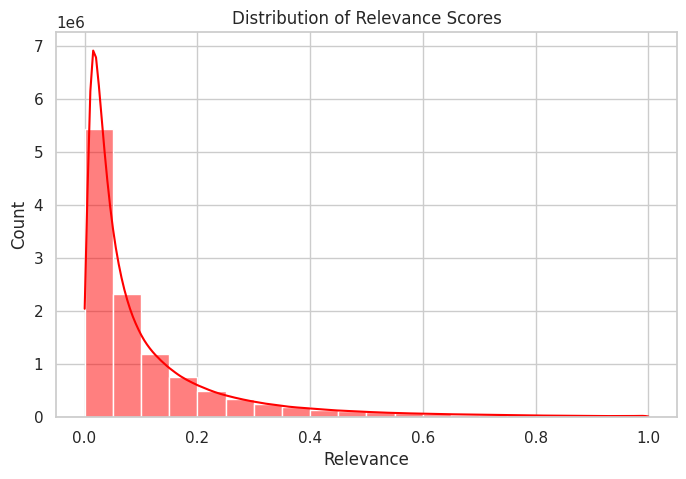

In [42]:

plt.figure(figsize=(8, 5))
sns.histplot(genome_scores['relevance'], bins=20, kde=True, color='red')
plt.title("Distribution of Relevance Scores")
plt.xlabel("Relevance")
plt.ylabel("Count")
plt.show()

## Correlación entre relevancia de las etiquetas

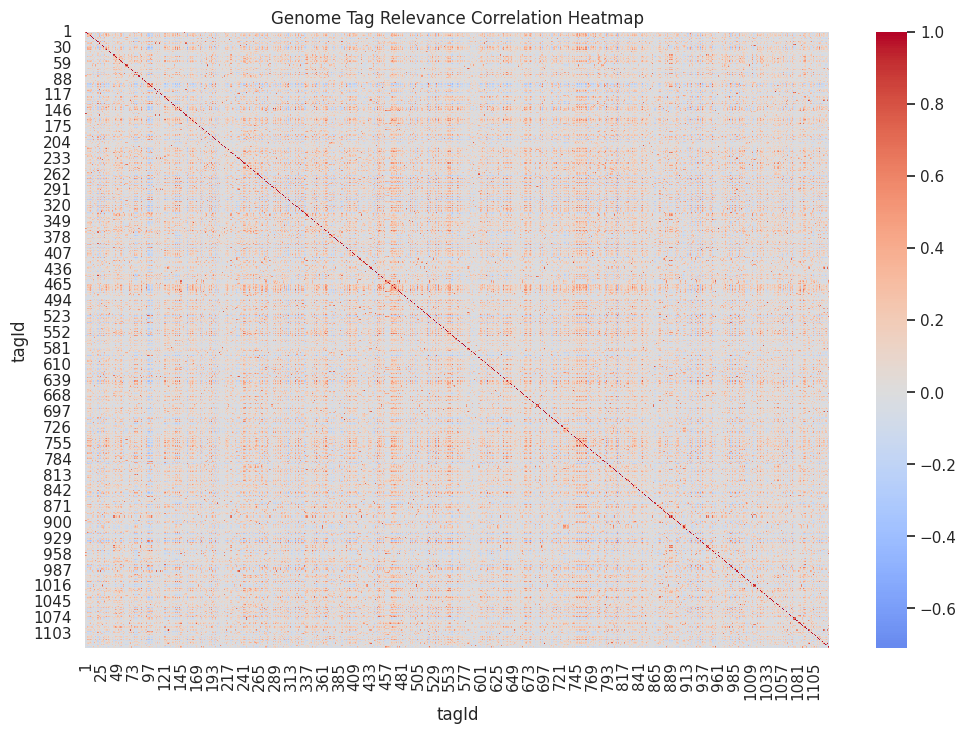

In [43]:

correlation_matrix = genome_scores.pivot(index='movieId', columns='tagId', values='relevance').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0)
plt.title("Genome Tag Relevance Correlation Heatmap")
plt.show()